In [10]:
import pandas
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import csv

In [11]:
dataset = []

with open('../Market_Basket_AR.csv') as f:
   reader = csv.reader(f)
   for row in reader:
      dataset.append(row)
      
dataset


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [12]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pandas.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [14]:
print(df['chocolate'].value_counts()[True])

1229


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo đối tượng DiGraph
G = nx.DiGraph()

# Tạo các node cho đồ thị
for itemset in frequent_itemsets:
    G.add_node(tuple(itemset), support=frequent_itemsets[itemset])

# Tạo các cạnh cho đồ thị
for itemset1 in frequent_itemsets:
    for itemset2 in frequent_itemsets:
        if itemset1.issubset(itemset2) and itemset1 != itemset2:
            G.add_edge(tuple(itemset1), tuple(itemset2))

# Vẽ đồ thị
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=1000, with_labels=True, font_size=18)
nx.draw_networkx_nodes(G, pos=pos, node_size=[1000*frequent_itemsets[node]**0.5 for node in G.nodes], node_color='r', alpha=0.5)
nx.draw_networkx_edges(G, pos=pos, width=2, alpha=0.5, edge_color='k')
nx.draw_networkx_labels(G, pos=pos, font_size=18, font_color='w')

plt.axis('off')
plt.show()


AttributeError: 'str' object has no attribute 'issubset'

In [6]:
if not frequent_itemsets.empty:
   rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


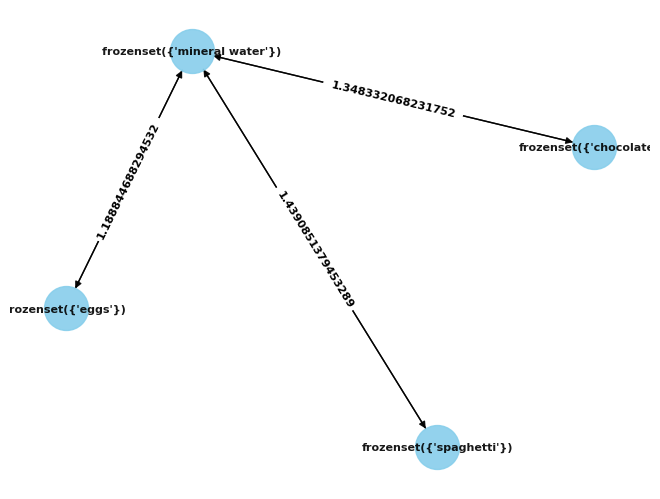

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# tạo đồ thị
G = nx.DiGraph()

# thêm các cạnh vào đồ thị
for index, row in rules.iterrows():
   G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# vẽ đồ thị
pos = nx.spring_layout(G, k=10)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, node_color='skyblue', font_weight='bold', edge_color='black', width=1, alpha=0.9)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_weight='bold')
plt.show()